# Data recording sheet







| Testing information | |
|---|---|
| Experiment | Rock vs No Rock |
| Description | Test effect of bicycle lean on maximal power output |
| Date | September 10, 2020 |
| Location | Locomotion Laboratory  |
| Subject | BC |
| Calibration factor | 329 |

---
## Protocol

- Charge Garmin, iPad, and IMUs
- Consent form
- Attach IMUs (frame=2050 , crank=2431)
- Set saddle height and handlebar position
- Sanitize bicycle
- Calibrate power meter
- Warm up
- Familiarization trials
- Pmax Test
- Begin experimental trials
  - Sync IMUs with Garmin at start and end of each trial 
- Gift card & signature

---
## Record

| Conditions ||
|---|---|
| 1 | Ad libitum |
| 2 | Self-restricted |
| 3 | Locked |

| Trial order ||
|---|---|
| Warm Up | 5 min at 100 W (3.5 lb) |
| Famil. | Standing and leaning (8.5 lb) |
| Pmax Test | 1, 1, 1 |
| Block 1 | 1, 2, 3 |
| Block 2 | 3, 1, 2 |
| Block 3 | 2, 3, 1 |

| Environmental conditions | |
|---|---|
| Temp. (C) |  |
| Humidity (%) |  |
| Pressure (mmHg) |  |
| Altitude (m) | 1641 |

| Subject characteristics ||
|---|---|
| Sex | M |
| Age (yrs) | 21 |
| Mass (lb/kg) | 145 /  |
| Height (ft/m) | 6'2" /  |

In [ ]:
# initialize packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# calculate hanging weights for Pmax test
mass = 145
listPerc = [0.06, 0.12, 0.18]
listRes = np.array(listPerc)*mass
listRes

array([ 8.7, 17.4, 26.1])

---
## Pmax and Experimental Results
* Record directly to dataframe

In [ ]:
# create data table
df = pd.DataFrame(np.array([
                            [9, 0, 1, 8.5, 751, 153], 
                            [9, 0, 2, 17.5, 922, 108], 
                            [9, 0, 3, 26, 716, 61],
                            [9, 1, 1, 17, 897, 108], 
                            [9, 3, 1, 17, 909, 109], 
                            [9, 2, 1, 17, 870, 105],
                            [9, 2, 2, 17, 824, 110],
                            [9, 3, 2, 17, 948, 114],
                            [9, 1, 2, 17, 937, 119],
                            [9, 1, 3, 17, 923, 115],
                            [9, 2, 3, 17, 932, 116],
                            [9, 3, 3, 17, 969, 115]
                            ]),
                    columns=['subject', 'condition', 'trial', 'hanging weight', 'power', 'cadence'])
df

,subject,condition,trial,hanging weight,power,cadence
0,9.0,0.0,1.0,8.5,751.0,153.0
1,9.0,0.0,2.0,17.5,922.0,108.0
2,9.0,0.0,3.0,26.0,716.0,61.0
3,9.0,1.0,1.0,17.0,897.0,108.0
4,9.0,3.0,1.0,17.0,909.0,109.0
5,9.0,2.0,1.0,17.0,870.0,105.0
6,9.0,2.0,2.0,17.0,824.0,110.0
7,9.0,3.0,2.0,17.0,948.0,114.0
8,9.0,1.0,2.0,17.0,937.0,119.0
9,9.0,1.0,3.0,17.0,923.0,115.0


---
##Data Analysis
* Fit curve to Pmax test results
* Calculate mean and SD power and cadence for experimental trials

Predicted maximal power output is 923.0000000000008
Predicted optimal hanging weight is 17.0


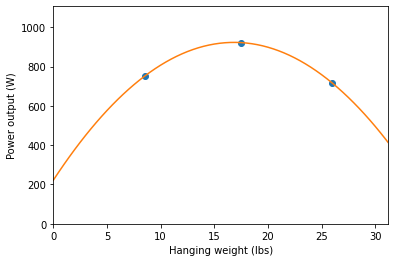

In [ ]:
# fit curve to Pmax trials
# set data
x = df['hanging weight'][df['condition'] == 0]
y = df['power'][df['condition'] == 0]

# calculate polynomial 
c = np.polyfit(x,y,2)
poly = np.poly1d(c)

# calculate new x and y values
new_x = np.linspace(0, 50, 101)
new_y = poly(new_x)

# plot the polynomial
plt.plot(x, y, "o", new_x, new_y)
plt.xlim([0, max(x)*1.2])
plt.ylim([0, max(y)*1.2])
plt.xlabel('Hanging weight (lbs)')
plt.ylabel('Power output (W)')

ind = np.argmax(new_y)
xOpt = new_x[ind]
yOpt = max(new_y)

print("Predicted maximal power output is", yOpt)
print("Predicted optimal hanging weight is", xOpt)

In [ ]:
# calculate condition mean
df.groupby('condition')[['power','cadence']].mean()

,power,cadence
condition,,
0.0,796.333333,107.333333
1.0,919.000000,114.000000
2.0,875.333333,110.333333
3.0,942.000000,112.666667


In [2]:
# calculate condition sd
df.groupby('condition')[['power','cadence']].std()

NameError: ignored

adfsflk

In [3]:
lfsfjl

NameError: ignored